In [18]:
import sys
sys.path.append('machine_learning')
import numpy as np
import nn.perceptron as perceptron
import sklearn.datasets as datasets
import metrics.metrics as metrics
import matplotlib.pyplot as plt
iris = datasets.load_iris()
X = iris.data[:100,1:3]
y = iris.target[:100:]

n = X.shape[0]
n_test = int(np.rint(0.2 * n))

# random sort
idx = np.random.permutation(n)
X = X[idx]
y = y[idx]

X_train = X[:-n_test]
X_test = X[-n_test:]
y_train = y[:-n_test]
y_test = y[-n_test:]

""" data normalization, improve convergence """
mu = np.mean(X_train, axis = 0)
dst = np.std(X_train, axis = 0)
X_train = (X_train - mu) / dst
X_test = (X_test - mu) / dst
print('train: {}'.format(X_train.shape))
print('val: {}'.format(X_test.shape))

it 0 mse loss_bce 0.8332768462324498 loss_mse 0.3193997371547037
it 0 acc 0.0125
it 1 mse loss_bce 0.8220723147409645 loss_mse 0.31393046163544075
it 1 acc 0.0125
it 2 mse loss_bce 0.811035203815251 loss_mse 0.30852473379773837
it 2 acc 0.0125
it 3 mse loss_bce 0.8001674567704047 loss_mse 0.30318545513711675
it 3 acc 0.0125
it 4 mse loss_bce 0.7894707184973581 loss_mse 0.29791532616593597
it 4 acc 0.0125
it 5 mse loss_bce 0.7789463365320266 loss_mse 0.2927168394171963
it 5 acc 0.025
it 6 mse loss_bce 0.7685953638909361 loss_mse 0.2875922741763411
it 6 acc 0.025
it 7 mse loss_bce 0.7584185635911312 loss_mse 0.28254369293998527
it 7 acc 0.025
it 8 mse loss_bce 0.7484164147523618 loss_mse 0.2775729395736951
it 8 acc 0.0625
it 9 mse loss_bce 0.7385891201624737 loss_mse 0.2726816391160045
it 9 acc 0.1125
it 10 mse loss_bce 0.7289366151728857 loss_mse 0.26787119915332097
it 10 acc 0.1125
it 11 mse loss_bce 0.7194585777801491 loss_mse 0.2631428126707024
it 11 acc 0.1625
it 12 mse loss_bce 0.7

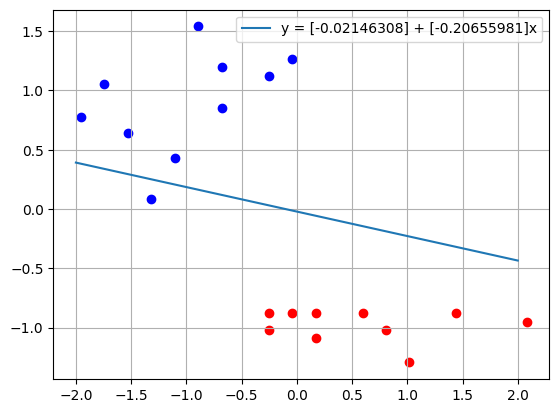

In [20]:
"""-------------------------------------------"""
#Logistic Regression
model = perceptron.Perceptron()
model.setLoss('mse')
model.setSteps(50)
model.setPrintSteps(1)


coeff = model.fit(X_train, y_train)
#Evaluation (accuracy x clase)
y_pred =model.predict(X_test)


acc= metrics.accuracy(np.expand_dims(y_test, axis = 1) , y_pred)
print('Acc Test {}'.format(acc))
#--- view
plt.scatter(X_test[y_test==0][:,0], X_test[y_test==0][:,1], color = 'red')
plt.scatter(X_test[y_test==1][:,0], X_test[y_test==1][:,1], color = 'blue')
x = np.linspace(-2, 2, 400)
y = coeff[0] + coeff[1]*x
plt.plot(x, y, label = f'y = {coeff[0]} + {coeff[1]}x')
plt.grid(True)
plt.legend()
plt.show()